<a href="https://colab.research.google.com/github/Narita-1095305/AI-datascience-math/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%92%E4%BD%BF%E3%81%A3%E3%81%9F%E5%88%86%E6%9E%90%E3%82%92%E8%A1%8C%E3%81%A3%E3%81%A6%E3%81%BF%E3%82%88%E3%81%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Colaboratory環境の設定
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AI-datascience-math/chapter2

Mounted at /content/drive
/content/drive/MyDrive/AI-datascience-math/chapter2


**2-1:顧客の行動パターンの類似度を計算しよう**

In [3]:
import pandas as pd
df_info = pd.read_csv("accomodation_info.csv", index_col=0, parse_dates=[0])
df_info

,顧客ID,宿泊者名,プラン,金額
日時,,,,
2018-11-01 00:02:21,110034,若松 花子,B,19000
2018-11-01 00:03:10,112804,津田 美加子,D,20000
2018-11-01 00:06:19,110275,吉本 美加子,D,20000
2018-11-01 00:08:41,110169,坂本 直人,B,19000
2018-11-01 00:12:22,111504,青山 零,A,15000
...,...,...,...,...
2020-10-31 23:38:51,110049,吉本 篤司,A,3000
2020-10-31 23:42:12,110127,喜嶋 浩,A,3000
2020-10-31 23:47:24,115464,藤本 明美,D,8000


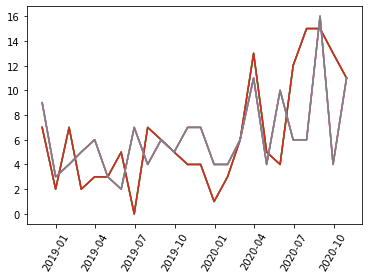

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
#indexの抽出
x_0 = df_info.resample('M').count()
x_0 = x_0.drop(x_0.columns.values,axis=1)
# 順位の設定
i_rank = 1
j_rank = 2
# 顧客IDの抽出
i_id = df_info['顧客ID'].value_counts().index[i_rank]
j_id = df_info['顧客ID'].value_counts().index[j_rank]
# 月ごとの利用回数を特徴量として抽出
x_i = df_info[df_info['顧客ID'] == i_id].resample('M').count()
x_j = df_info[df_info['顧客ID'] == j_id].resample('M').count()
# 欠損地の穴埋め
x_i = pd.concat([x_0, x_i], axis=1).fillna(0)
x_j = pd.concat([x_0, x_j], axis=1).fillna(0)
# 描画

plt.plot(x_i)
plt.plot(x_j)
plt.xticks(rotation=60)
plt.show()

In [10]:
import pandas as pd
import numpy as np

dx = x_i.iloc[:,0].values-x_j.iloc[:,0].values

n = np.linalg.norm(dx)

num_dim = len(x_i)
d = n / num_dim
print("類似度:",d)

類似度: 0.798218502527834
